In [1]:
# python3 -m pip install pandas
import pandas as pd

# open the csv file and describe the ; as the separator
exp_inc = pd.read_csv("expenses_and_income.csv", sep=";")
exp_inc


,Date,Description,Category,Out,In
0,2020-06-02,Salary Frank,Income,0.00,4896.44
1,2020-06-03,supermarket,food and beverages,132.40,0.00
2,2020-06-04,Salary Laura,Income,0.00,4910.14
3,2929-06-04,"GreenEnergy Corp., (electricity)",utility,87.34,0.00
4,2020-06-09,water and sewage,utility,60.56,0.00
5,2020-06-10,"Fitness studio, Jane",health and sports,19.00,0.00
6,2020-06-11,payment to bank,monthly redemption payment,1287.43,0.00
7,2020-06-12,LeGourmet Restaurant,restaurants and hotels,145.00,0.00
8,2020-06-13,supermarket,food and beverages,197.42,0.00
9,2020-06-13,Pizzeria da Pulcinella,restaurants and hotels,60.00,0.00


In [2]:
exp_inc[['Out', 'In']].sum()


Out     5097.44
In     19613.16
dtype: float64

In [3]:
category_sums = exp_inc.groupby("Category").sum()
category_sums


,Date,Description,Out,In
Category,,,,
Income,2020-06-022020-06-042020-07-022020-07-05,Salary FrankSalary LauraSalary FrankSalary Laura,0.00,19613.16
education and culture,2020-06-272020-07-23,theatre ticketsCinema,144.00,0.00
food and beverages,2020-06-032020-06-132020-06-262020-07-032020-0...,supermarketsupermarketsupermarketsupermarketsu...,1174.61,0.00
health and sports,2020-06-102020-07-082020-07-10,"Fitness studio, JaneGolf Club, yearly paymentF...",650.18,0.00
insurances and taxes,2020-07-09,house insurance,167.89,0.00
monthly redemption payment,2020-06-112020-07-11,payment to bankpayment to bank,2574.86,0.00
restaurants and hotels,2020-06-122020-06-132020-07-13,LeGourmet RestaurantPizzeria da PulcinellaPizz...,238.00,0.00
utility,2929-06-042020-06-09,"GreenEnergy Corp., (electricity)water and sewage",147.90,0.00


In [4]:
category_sums.index

Index(['Income', 'education and culture', 'food and beverages',
       'health and sports', 'insurances and taxes',
       'monthly redemption payment', 'restaurants and hotels', 'utility'],
      dtype='object', name='Category')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Income'),
  Text(1, 0, 'education and culture'),
  Text(2, 0, 'food and beverages'),
  Text(3, 0, 'health and sports'),
  Text(4, 0, 'insurances and taxes'),
  Text(5, 0, 'monthly redemption payment'),
  Text(6, 0, 'restaurants and hotels'),
  Text(7, 0, 'utility')])

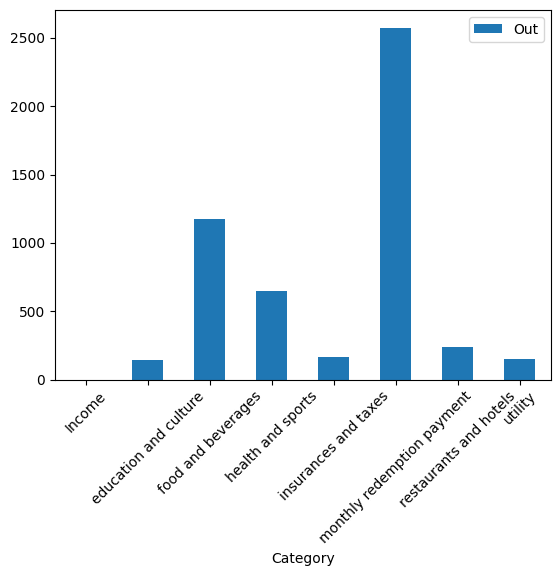

In [5]:
import matplotlib.pyplot as plt

ax = category_sums.plot.bar(y="Out")
plt.xticks(rotation=45)


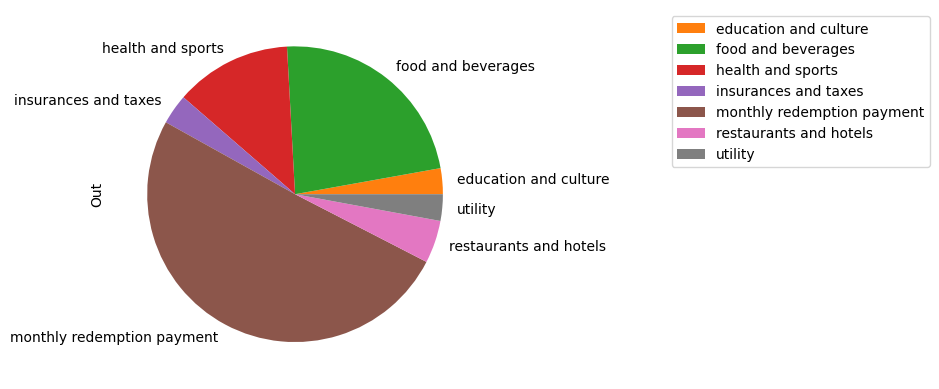

In [6]:
ax = category_sums.plot.pie(y="Out")
ax.legend(loc="upper left", bbox_to_anchor=(1.5, 1))


In [7]:
category2account = {'monthly redemption payment': '200',
                    'insurances and taxes': '201',
                    'food and beverages': '202',
                    'education and culture': '203',
                    'transport': '204',
                    'health and sports': '205',
                    'household goods and services': '206',
                    'clothing': '207',
                    'communications': '208',
                    'restaurants and hotels': '209',
                    'utility': '210',
                    'other expenses': '211',
                    'Income': '400'}


In [8]:
exp_inc.replace(category2account, inplace=True)
exp_inc.rename(columns={"Category": "Accounts"}, inplace=True)
exp_inc[:5]


,Date,Description,Accounts,Out,In
0,2020-06-02,Salary Frank,400,0.00,4896.44
1,2020-06-03,supermarket,202,132.40,0.00
2,2020-06-04,Salary Laura,400,0.00,4910.14
3,2929-06-04,"GreenEnergy Corp., (electricity)",210,87.34,0.00
4,2020-06-09,water and sewage,210,60.56,0.00


In [10]:
exp_inc['Account'] = exp_inc['Description'].map(category2account)
exp_inc

,Date,Description,Accounts,Out,In,Account
0,2020-06-02,Salary Frank,400,0.00,4896.44,NaN
1,2020-06-03,supermarket,202,132.40,0.00,NaN
2,2020-06-04,Salary Laura,400,0.00,4910.14,NaN
3,2929-06-04,"GreenEnergy Corp., (electricity)",210,87.34,0.00,NaN
4,2020-06-09,water and sewage,210,60.56,0.00,NaN
5,2020-06-10,"Fitness studio, Jane",205,19.00,0.00,NaN
6,2020-06-11,payment to bank,200,1287.43,0.00,NaN
7,2020-06-12,LeGourmet Restaurant,209,145.00,0.00,NaN
8,2020-06-13,supermarket,202,197.42,0.00,NaN
9,2020-06-13,Pizzeria da Pulcinella,209,60.00,0.00,NaN
